<!-- 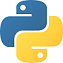 -->
# 06 Search and Sorting Algorithms

## Plan for the lecture 

* Recap on Asymptotic Complexity

* Sort algorithms 

* Search algorithms 

# Recap on Asymptotic complexity (Algorithmic Complexity)
Taken from Cormen et al. (2022) book 'Algorithms'

Asymptotic complexity, often referred to as algorithmic complexity, is a way to analyse and describe the efficiency of an algorithm in terms of how its runtime or resource usage grows relative to the size of the input data. 

It provides a mathematical of measuring an algorithm's performance by how it scales for large input sizes. The most commonly used notations for asymptotic complexity are Big O, Big Theta, and Big Omega:
 
* Big O notation describes the asymptotic upper bound – grows no faster than this rate $O(n)$ – <b>no more than </b> linear time
* Big Omega $\Omega$ describes the asymptotic lower bound – grows at least as fast as this rate $\Omega (n)$ – <b>at least</b> linear time
* Big Theta $\Theta$ describes the asymptotically tight bounds – grows precisely at a certain rate $\Theta(n)$ – <b>exactly</b> linear time


# Algorithmic Common Runtimes #
The common algorithmic runtimes from fastest to slowest are:

- constant: $O(1)$
- logarithmic: $O(log$ $n)$
- linear: $O(n)$
- linearithmic $O(n$ $log$ $n)$
- quadratic: $O(n^2)$
- exponential: $O(2^n)$ 
- factorial: $O(n!)$


![bigo](https://cdn-media-1.freecodecamp.org/images/1*KfZYFUT2OKfjekJlCeYvuQ.jpeg)

## How do you calculate the run-time?
(below is from Gayle Laakmann McDowell's 'Cracking the Coding Interview book'):
* <b>Different steps get added</b>

```
    def function(): 
        do_step_1() # O(a)
        do_step_2() # O(b)    = O(a+b)
```

* <b>Drop constants</b>
    * Rememeber $n$ is the size of the array / list.
    * Tempting to describe below as $2 \times O(n)$ or $O(2n)$
    * Instead, drop the constant ($2$) is 'droppped' and focus on the runtime category of $O(n)$ or `linear`. 
    * It's the `linear` classification rather than the `quadratic` classification.
```
    def min_max(l): 
        for i in l: # O(n)
            calc_min()
        for i in l: # O(n)
            calc_max()
```

* <b>Different inputs (different arrays sizes) are treated independently</b>

    * Below is NOT $O(n^2)$ if list `a` and `b` are different sizes `(l_a != l_b)`
    * The size $n$ would have to be the same for both list `a` and list `b` to be $n \times n$
```
        def intersection(l_a, l_b):
            count = 0
            for a in l_a:       # O(a)
                for b in l_b:   # O(b)      O(a x b)
                    if a == b:
                        count += 1
            return count
```


* <b>Drop non-determinent terms</b>

    * Out of the two runtime categories below, which is the most descriptive of the function (on average)? 
    * We don't need to classify this function as $O(n) + O(n^2)$ or $O(n + n^2)$
    * $O(n)$ could be the best case if we don't run the nested loop. 
    * $O(n^2)$ would describe the average case if we had to run the nested loop. 

```
    def loop_mix():
        for i in l: # O(n)
            do_something()

        for i in l: # O(n x n) = O(n^2)       
            for i in l: 
                do_something_else()
```


## Example of $O(n)$ runtime

In [ ]:
def half(N):
  count = 0
  while N > 1:
    N = N//2
    count += 1
  return count

In [ ]:
def find_max(linked_list):
  current = linked_list.get_head_node()
  maximum = current.get_value()
  while current.get_next_node():
    current = current.get_next_node()
    val = current.get_value()
    if val > maximum:
      maximum = val
  return maximum

# Swap - $O(1)$?

* If performed once - yes - constant $O(1)$

* If multiple swaps performed part of a single loop - the whole algorithm would be $O(n)$

* If performed in Bubble Sort, with nested loops - likely to be $O(n^2)$

In [ ]:
def swap(arr, left_pos, right_pos):
  temp = arr[left_pos]
  arr[left_pos] = arr[right_pos]
  arr[right_pos] = temp

# Bubble Sort - $O(n^2)$

* Bubble sort works by swapping pairs of elements in an array.

* To sort in ascending order (smallest to largest), then the larger values have to be moved further down the end of the list, and the small values are then moved to the start of the list.

* Bubble sort has to keep iterating over the list so that this occurs.

![bubble](https://upload.wikimedia.org/wikipedia/commons/5/54/Sorting_bubblesort_anim.gif)

In [1]:
nums = [9, 8, 7, 6, 5, 4, 3, 2, 1]
print("PRE SORT: {0}".format(nums))

def swap(arr, index_1, index_2):
  temp = arr[index_1]
  arr[index_1] = arr[index_2]
  arr[index_2] = temp

def bubble_sort_unoptimized(arr):
  iteration_count = 0
  for el in arr:
    for index in range(len(arr) - 1):
      iteration_count += 1
      if arr[index] > arr[index + 1]:
        swap(arr, index, index + 1)

  print("PRE-OPTIMIZED ITERATION COUNT: {0}".format(iteration_count))

def bubble_sort_optimized(arr):
  iteration_count = 0
  for i in range(len(arr)):
    # iterate through unplaced elements
    for idx in range(len(arr) - i - 1):
      iteration_count += 1
      if arr[idx] > arr[idx + 1]:
        # replacement for swap function
        arr[idx], arr[idx + 1] = arr[idx + 1], arr[idx]
        
  print("POST-OPTIMIZED ITERATION COUNT: {0}".format(iteration_count))

bubble_sort_unoptimized(nums.copy())
bubble_sort_optimized(nums)
print("POST SORT: {0}".format(nums))

PRE SORT: [9, 8, 7, 6, 5, 4, 3, 2, 1]
PRE-OPTIMIZED ITERATION COUNT: 72
POST-OPTIMIZED ITERATION COUNT: 36
POST SORT: [1, 2, 3, 4, 5, 6, 7, 8, 9]


# Merge Sort - $\Theta (n$ $log$ $n)%$
Merge Sort is a divide and conquer algorithm. It consists of two parts:

1. Splitting the original list into smaller sorted lists recursively until there is only 1 element in the list,

2. Merging back the presorted 1-element lists into 2-element lists, 4-element lists, and so on recursively.

* The merging portion is iterative and takes 2 sublists. 
* The first element of the left sublist is compared to the first element of the right sublist. 
* If it is smaller, it is added to a new sorted list, and removed from the left sublist. 
* If it is bigger, the first element of the right sublist is added instead to the sorted list and then removed from the right sublist. 
* This is repeated until either the left or right sublist is empty. 
* The remaining non-empty sublist is appended to the sorted list.

![mergesort](https://i0.wp.com/blog.shahadmahmud.com/wp-content/uploads/2020/04/ms2.gif?resize=960%2C540&ssl=1)


![merge_sort_](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Merge_sort_algorithm_diagram.svg/300px-Merge_sort_algorithm_diagram.svg.png)

In [2]:
def merge_sort(items):
  if len(items) <= 1:
    return items

  middle_index = len(items) // 2
  left_split = items[:middle_index]
  right_split = items[middle_index:]

  left_sorted = merge_sort(left_split)
  right_sorted = merge_sort(right_split)

  return merge(left_sorted, right_sorted)

def merge(left, right):
  result = []

  while (left and right):
    if left[0] < right[0]:
      result.append(left[0])
      #print(result)
      left.pop(0)
    else:
      result.append(right[0])
      #print(result)
      right.pop(0)

  if left:
    result += left
  if right:
    result += right

  return result

unordered_list1 = [356, 746, 264, 569, 949, 895, 125, 455]
unordered_list2 = [787, 677, 391, 318, 543, 717, 180, 113, 795, 19, 202, 534, 201, 370, 276, 975, 403, 624, 770, 595, 571, 268, 373]
unordered_list3 = [860, 380, 151, 585, 743, 542, 147, 820, 439, 865, 924, 387]

ordered_list1 = merge_sort(unordered_list1)
ordered_list2 = merge_sort(unordered_list2)
ordered_list3 = merge_sort(unordered_list3)

print(ordered_list1)
print(ordered_list2)
print(ordered_list3)

[125, 264, 356, 455, 569, 746, 895, 949]
[19, 113, 180, 201, 202, 268, 276, 318, 370, 373, 391, 403, 534, 543, 571, 595, 624, 677, 717, 770, 787, 795, 975]
[147, 151, 380, 387, 439, 542, 585, 743, 820, 860, 865, 924]


The Merge Sort algorithm is divided into two parts: 

1. The first part repeatedly splits the input list into smaller lists to eventually produce single-element lists. The best, worst and average runtime for this part is $\Theta (log$ $n)$.

2. The second part repeatedly merges and sorts the single-element lists to twice its size until the original input size is achieved. The best, worst and average runtime for this part is $\Theta (n)$. 

Therefore, the combined runtime is $\Theta(n$ $log$ $n)$.

# Quicksort - avg: $O(n$ $ log$ $n)$, but in rare cases: $O(n^2)$
Quicksort’s performance can be inefficient when the algorithm encounters imbalanced partitions. 

The worst case scenario is if the first or last element is always the partition point for an array or sub-array. In this case, one side of the partition will contain all the elements. This makes the recursive stack deeper, resulting in $O(n^2)$ runtime.

* Choose a Pivot: Pick an element from the list to act as a “pivot.” A common choice is the middle element, the first element, or the last element.

* Partitioning: Rearrange elements so that values less than the pivot are moved to the left of the pivot, and values greater than the pivot are moved to the right.

![quicksort](https://upload.wikimedia.org/wikipedia/commons/6/6a/Sorting_quicksort_anim.gif)


Quicksort is a method for sorting an array by repeatedly partitioning it into sub-arrays by:

* Selecting an element from the current array. This element is called the pivot element, and in our implementation we used the mid element.

* Comparing every element in the array to the pivot element, swap the elements into sides greater than and less than. The partition point in the array is where we guarantee everything before is less and everything after is greater than.

* Repeating this process on the sub-arrays separated by the partition point. Do this until a sub-array contains a single element. When the partitioning and swapping are done, the arrays are sorted from smallest to largest.


![quick_sort](https://www.tutorialspoint.com/data_structures_algorithms/images/quick_sort_partition_animation.gif)

* The worst case runtime for quicksort is $O(n^2)$ and the average runtime for quicksort is $O(n$ $ log$ $n)$. 

* The worst case runtime is so unusual that the quicksort algorithm is typically referred to as $O(n$ $ log$ $n)$. 

* The worst case occurs when the pivot is consistently the smallest or largest element, leading to highly unbalanced partitions.

In [3]:
from random import randrange, shuffle

def quicksort(list, start, end):
  # this portion of list has been sorted
  if start >= end:
    return
  print("Running quicksort on {0}".format(list[start: end + 1]))
  # select random element to be pivot
  pivot_idx = randrange(start, end + 1)
  pivot_element = list[pivot_idx]
  print("Selected pivot {0}".format(pivot_element))
  # swap random element with last element in sub-lists
  list[end], list[pivot_idx] = list[pivot_idx], list[end]

  # tracks all elements which should be to left (lesser than) pivot
  less_than_pointer = start
  
  for i in range(start, end):
    # we found an element out of place
    if list[i] < pivot_element:
      # swap element to the right-most portion of lesser elements
      print("Swapping {0} with {1}".format(list[i], pivot_element))
      list[i], list[less_than_pointer] = list[less_than_pointer], list[i]
      # tally that we have one more lesser element
      less_than_pointer += 1
  # move pivot element to the right-most portion of lesser elements
  list[end], list[less_than_pointer] = list[less_than_pointer], list[end]
  print("{0} successfully partitioned".format(list[start: end + 1]))
  # recursively sort left and right sub-lists
  quicksort(list, start, less_than_pointer - 1)
  quicksort(list, less_than_pointer + 1, end)


list = [5,3,1,7,4,6,2,8]
shuffle(list)
print("PRE SORT: ", list)
print(quicksort(list, 0, len(list) -1))
print("POST SORT: ", list)


PRE SORT:  [6, 4, 5, 7, 2, 1, 3, 8]
Running quicksort on [6, 4, 5, 7, 2, 1, 3, 8]
Selected pivot 1
[1, 4, 5, 7, 2, 8, 3, 6] successfully partitioned
Running quicksort on [4, 5, 7, 2, 8, 3, 6]
Selected pivot 7
Swapping 4 with 7
Swapping 5 with 7
Swapping 6 with 7
Swapping 2 with 7
Swapping 3 with 7
[4, 5, 6, 2, 3, 7, 8] successfully partitioned
Running quicksort on [4, 5, 6, 2, 3]
Selected pivot 5
Swapping 4 with 5
Swapping 3 with 5
Swapping 2 with 5
[4, 3, 2, 5, 6] successfully partitioned
Running quicksort on [4, 3, 2]
Selected pivot 4
Swapping 2 with 4
Swapping 3 with 4
[2, 3, 4] successfully partitioned
Running quicksort on [2, 3]
Selected pivot 3
Swapping 2 with 3
[2, 3] successfully partitioned
None
POST SORT:  [1, 2, 3, 4, 5, 6, 7, 8]


# Linear Search - $O(n)$

* Linear search can be used to search for the smallest or largest value in an unsorted list rather than searching for a match. 

* It can do so by keeping track of the largest (or smallest) value and updating as necessary as the algorithm iterates through the dataset.

![linear_search](https://sushrutkuchik.wordpress.com/wp-content/uploads/2020/05/linear_search.gif?w=438)

In [4]:
number_list = [ 10, 14, 19, 26, 27, 31, 33, 35, 42, 44]
target_number = 33

def linear_search(search_list, target_value):
  for idx in range(len(search_list)):
    if search_list[idx] == target_value:
      return idx
  raise ValueError("{0} not in list".format(target_value))


try:
  # Call the function below...
  result = linear_search(number_list, target_number)
  print(result)
  linear_search(number_list, 100)
except ValueError as error_message:
  print("{0}".format(error_message))

6
100 not in list


# Finding Duplicates

In [5]:
# Search list and target value
tour_locations = [ "New York City", "Los Angeles", "Bangkok", "Istanbul", "London", "New York City", "Toronto"]
target_city = "New York City"

#Linear Search Algorithm
def linear_search(search_list, target_value):
  matches = []
  for idx in range(len(search_list)):
    if search_list[idx] == target_value:
      matches.append(idx)
  if matches:
    return matches
  else:
    raise ValueError("{0} not in list".format(target_value))

#Function call
tour_stops = linear_search(tour_locations, target_city)
print(tour_stops)


[0, 5]


# Finding the Maximum Value
In this algorithm we look at each item in turn and update the maximum if a number looked at is greater than the one stored.

In [6]:
# Search list
test_scores = [88, 93, 75, 100, 80, 67, 71, 92, 90, 83]


#Linear Search Algorithm
def linear_search(search_list):
  maximum_score_index = None
  for idx in range(len(search_list)):
    if not maximum_score_index or search_list[idx] > search_list[maximum_score_index]:
      maximum_score_index = idx
  return maximum_score_index

# Function call
highest_score = linear_search(test_scores)

#Prints out the highest score in the list
print(highest_score)


3


# Finding index position

In [7]:
# A list of the ingredients for tuna sushi
recipe = ["nori", "tuna", "soy sauce", "sushi rice"]
target_ingredient = "soy sauce"

def linear_search(search_list, target_value):
  for idx in range(len(search_list)):
    if search_list[idx] == target_value:
      return idx
  raise ValueError("{0} not in list".format(target_value))

print(linear_search(recipe, target_ingredient))

2


# Recursive Binary Search - $O(log$ $n)$

* The other approach is to utilise a <b>'divide and conquer'</b> approach to split the list in half each iteration. 

* <b>It requires a sorted list.</b> If the value is less than the middle, then it will be in the first half of the list. 

![Binarysearchvslinear](https://blog.penjee.com/wp-content/uploads/2015/04/binary-and-linear-search-animations.gif)

* Recursion is when a block of code calls itself. It does so until a base (end) case is specified.

* The recursive calls are 'stacked' on top of each other, and when a condition is met (either the item found or run out of memory), the stacked calls are then executed.

* Exceeding the size of the stack is known as 'stack overflow'


In [9]:
# define binary_search()
def binary_search(sorted_list, target):
  if not sorted_list:
    return 'value not found'
  mid_idx = len(sorted_list)//2    # floor division
  mid_val = sorted_list[mid_idx]
  return mid_idx, mid_val


# For testing:
sorted_values = [13, 14, 15, 16, 17]
print(binary_search([], 42))
print(binary_search(sorted_values, 42))

value not found
(2, 15)


In [10]:
# define binary_search()
def binary_search(sorted_list, target):
  if not sorted_list:
    return 'value not found'
  mid_idx = len(sorted_list)//2    # floor division
  mid_val = sorted_list[mid_idx]
  if mid_val == target:
    return mid_idx

# For testing:
sorted_values = [13, 14, 15, 16, 17]
print(binary_search([], 42))
print(binary_search(sorted_values, 42))
print(binary_search(sorted_values, 15))

value not found
None
2


In [11]:
# define binary_search()
def binary_search(sorted_list, target):
  if not sorted_list:
    return 'value not found'
  mid_idx = len(sorted_list)//2   # floor division
  mid_val = sorted_list[mid_idx]
  if mid_val == target:
    return mid_idx
  if mid_val > target:
    left_half = sorted_list[:mid_idx]
    return binary_search(left_half, target)
  if mid_val < target:
    right_half = sorted_list[mid_idx+1:]
    result = binary_search(right_half, target)
    if result == "value not found":
      return result
    else:
      return result + mid_idx + 1
# For testing:
sorted_values = [13, 14, 15, 16, 17]
print(binary_search(sorted_values, 16))

3


In [4]:
def binary_search(sorted_list, left_pointer, right_pointer, target):
  # this condition indicates we've reached an empty "sub-list"
  if left_pointer >= right_pointer:
    return "value not found"
	
  # We calculate the middle index from the pointers now
  mid_idx = (left_pointer + right_pointer) // 2    # floor division
  mid_val = sorted_list[mid_idx]

  if mid_val == target:
    return mid_idx
  if mid_val > target:
    # we reduce the sub-list by passing in a new right_pointer
    return binary_search(sorted_list, left_pointer, mid_idx, target)
  if mid_val < target:
    # we reduce the sub-list by passing in a new left_pointer
    return binary_search(sorted_list, mid_idx + 1, right_pointer, target)
  
values = [77, 80, 102, 123, 288, 300, 540]
start_of_values = 0
end_of_values = len(values)
result = binary_search(values, start_of_values, end_of_values, 288)

print("element {0} is located at index {1}".format(288, result))

element 288 is located at index 4


# Iterative Binary Search

* The other approach is to utilise a 'divide and conquer' approach to split the list in half each iteration. 

* <b>It requires a sorted list.</b> If the value is less than the middle, then it will be in the first half of the list.

* This process is then applied iteratively to cut the list in half each time until the value is found.  

In [14]:
def binary_search(sorted_list, target):
  left_pointer = 0
  right_pointer = len(sorted_list)
  
  # fill in the condition for the while loop
  while left_pointer < right_pointer:
    # calculate the middle index using the two pointers
    mid_idx = (left_pointer + right_pointer) // 2  # floor division
    mid_val = sorted_list[mid_idx]
    if mid_val == target:
      return mid_idx
    if target < mid_val:
      # set the right_pointer to the appropriate value
      right_pointer = mid_idx
    if target > mid_val:
      # set the left_pointer to the appropriate value
      left_pointer = mid_idx + 1
  
  return "Value not in list"

# test cases
print(binary_search([5,6,7,8,9], 9))
print(binary_search([5,6,7,8,9], 10))
print(binary_search([5,6,7,8,9], 8))
print(binary_search([5,6,7,8,9], 4))
print(binary_search([5,6,7,8,9], 6))

4
Value not in list
3
Value not in list
1


## Exercise 

Implement an `init_list()` function which can generate a list of unsorted, randomly allocated values to a list. Code the function in a way that it can generate any size of list. 

We'll use this function to create small and large lists in future exercises.

Extension: Can you create an `init_array()` which will initialise and return a `numpy.array` of a size requested?

In [ ]:
def init_list():
    ...

In [ ]:
# Write your solution here. 


## Exercise

Implement a Bubble Sort algorithm which will sort a list into ascending order by swapping pairs of values. Call the `init_list()` function you coded in the previous exercise to generate a `small` list of 100 randomly assigned integers. Store this list in an `unsorted_small` variable. Then store the returned sorted list in a `sorted_small_bubble` list so you can compare and check that your algorithm works correctly. 

Question: What's the runtime of this algorithm? 

Extension: If you haven't already, optimise your Bubble Sort algorithm to perform with less operations. Compare the optimised version of Bubble Sort with the unoptimised version? Does the optimised algorithm improve the run-time? (in terms of Big O notation).

Extension: Can Bubble Sort be used to sort letters and strings into alphabetical order?

In [ ]:
def bubble_sort():
    ...

In [ ]:
# Write your solution here.


## Exercise 

Now implement the Merge Sort algorithm below so it will divide into sub lists and merge them back together in sorted order. Pass the `unsorted_small` list from the previous exercise to merge sort algorithm, and store the return in a `sorted_small_merge` variable so you can check the results. 

Question: What's the run-time of merge sort? 

In [ ]:
def merge_sort():
    ...

In [ ]:
# Write your solution here.


## Exercise 

Now call your `init_list` function to create a large list of 50,000 integers. Store the list returned in an `unsorted_large` variable. Now pass this `unsorted_large` to both your `bubble_sort()` and your `merge_sort()` algorithms and compare the difference in performance (time/operations). 

Question: What do you notice?

Extension: repeat this experiment for a `numpy.array`. Do you notice any performance differences?


In [ ]:
# Write your solution here.


## Exercise: 

Refer to your `node.py`, `linkedlist.py` and `doublylinkedlist.py` files. 

Write a function to check if the contents of a linked list are sorted in numerical order. Create or generate a linked list with numerical values. If your function returns `False` (not sorted), write a function that will sort the nodes in ascending numerical order (lowest to highest).

Extension: How hard would it be to reverse the order of a linked list from highest to lowest?

Extension: Can you sort / and reverse the order of a doubly linked list? 

Extension: Can you do the same for alphabetical order, in the case of string and character values stored in your linked list? (This maps to sorting a playlist by artist name, track name, or other numerical attributes such as play count).

In [ ]:
# Write your solution here.


## Exercise 

How would you sort a python dictionary in order by key? Assume the key is going to be a string, which maps to a value. 

In [ ]:
# Write your solution here.


## Exercise 

Now return to your `unsorted_small` list of numerical values. 

Write a `linear_search()` function which will iterate over the list until it finds and returns the index position of the `target` value sought, and `-1` if the value is not present in the list. Choose a target value that is in the range of the random values generated, and check that your `linear_search()` works as expected. 

Also check this works with a `sorted` version of `small` (either your bubble or merge - providing they both produced a sorted version of the same list).

Extension: check this function also works with a `numpy.array` of integer values.

In [ ]:
def linear_search():
    ...

In [ ]:
# Write your solution here.


## Exercise 

Implement both a recursive binary search function and an iterative binary search function, and compare their ability to locate a value. Start with one of your small lists, then apply to your large lists.

Question: Will these algorithms work with an `unsorted` list of values? If you're not sure, test and see! 

Question: Furthermore, if you have to sort the list, what runtime implications does this have? 

Question: Which one (recursive or binary) is more efficient? Do they both take the same time? Do they both take the same amount of operations?

In [ ]:
def binary_search_recursive():
    ...

In [ ]:
def binary_search_iterative():
    ...

In [ ]:
# Write your solution here.


## Exercise: 

If you have multiple instances of the same `target` value in your list, how can you return all index positions (indices) of the value sought? Amend your `linear_search()` with a parameter / argument so there is an option to search for and return the first instance of the target, or to return all instances found. 

Question: What are the performance ramifications of having to locate multiple instances of the `target` value?

In [ ]:
# Write a new copy of linear_search() here or amend the linear_search() function above. 


## Exercise

Compare the performance of linear and binary search (recursive and binary) across both small and large datasets. Make sure you test the algorithms on `targets` which would appear near the start of the `sorted_list` (best case), in the middle of the list of values (average case), and near the end of the algorithm (worst case). 

Question: Which of these algorithms is more efficient?

Question: What are the 'best', 'average' and 'worst' cases of these algorithms (in terms of Big O notation)? 

In [ ]:
# Write your solution here.


## Scenario Exercise: Autocomplete functionality! 

![autocomp](https://miro.medium.com/v2/resize:fit:1290/0*UstxEC0s_0erir_P.gif)

Build an autocomplete function that will show a sublist of results featuring the set of characters entered. Update this after each character is entered. 

Start small with creating a set of strings in a list. Stick to one word per string to start with.

Then ask the user to enter the first character. Show the strings which start with this first character. Then repeat the process for the next character, only showing strings which match those enter characters. 

Extension: implement this functionality in a search bar via a web interface. Switch to the Python Flask app and query a large dataset.

Extension: Can you implement a ranking/sorting system to show the most likely results (or best match) at the top of the list?

In [ ]:
# Write your autocomplete function here or in your flask py files.


## Scenario Exercsie: Simulate the search of a large dataset (like Amazon, Google, IMDB)

![amazon_csv](https://quickscraper.co/wp-content/uploads/2023/03/Amazon-Parser-CSV-1024x299.png)

In 2020, Amazon was estimated to have a catalog of more than 12 million products, books, media, wine, and services \([source](https://www.bigcommerce.co.uk/blog/amazon-statistics/#)\). If you expand this to Amazon Marketplace sellers the number is closer to more than 350 million products. So how do you achieve efficient search, with so many products? 

This Kaggle Dataset has over 300k Amazon items, seperated in 142 categories: https://www.kaggle.com/datasets/lokeshparab/amazon-products-dataset

Perhaps start with one of the csv files on this [GitHub repository](https://github.com/riteshc6/amazon_scraper/tree/master/downloads) for example the Computer and Electronics csv: https://github.com/riteshc6/amazon_scraper/blob/master/downloads/Computers%20%26%20Accessories.csv

With a web interface, first check that your application has access to this small scale csv. You could download it as a file, read it into a pandas DataFrame in Python, or even map the csv to a sqlite3 database!

Then build a search functionality to return related products from a given search string. 

Extension: Can you merge your autocomplete functionality from the previous exercise here?

Extension: Investigate whether there are APIs that you could use to get access to a large dataset? Furthermore, could you even build your own API that uses web scraping to extract data from sites (look into `scrapy`)? RESTful APIs usually return in JSON format.

In [ ]:
# Write your solution here or in your flask .py files. 
